### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

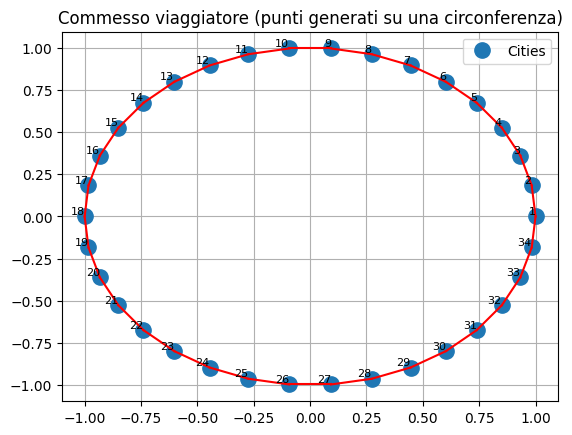

In [1]:
import matplotlib.pyplot as plt

# Leggi i dati dal file
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_9\lez9_1\circle.txt', "r") as file:
    lines = file.readlines()

# Estrai gli indici, le coordinate x e y dalle linee del file
indices = []
x = []
y = []
for line in lines:
    city_index, city_x, city_y = map(float, line.split())
    indices.append(int(city_index))
    x.append(city_x)
    y.append(city_y)

# Plot
plt.figure(1)
plt.plot(x, y, marker='o', linestyle='', markersize=11, label='Cities')

# Etichette con gli indici delle città
for i, city_index in enumerate(indices):
    plt.text(x[i], y[i], str(city_index), fontsize=8, ha='right', va='bottom')

# Linea che collega le città nell'ordine degli indici
for i in range(len(indices) - 1):
    plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='r', linestyle='-')

# Assicurati che l'ultimo punto si colleghi al primo
plt.plot([x[-1], x[0]], [y[-1], y[0]], color='r', linestyle='-')
plt.title('Commesso viaggiatore (punti generati su una circonferenza)')
plt.grid(True)
plt.legend()

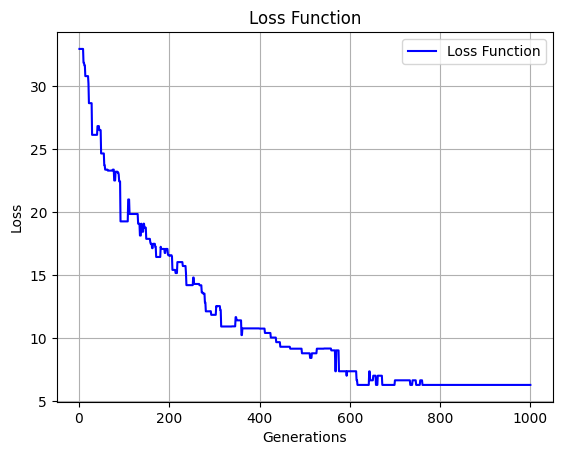

In [7]:
# Leggi i dati della loss dalla file
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_9\lez9_1\loss.txt', "r") as file:
    loss_values = [float(line.strip()) for line in file]

# Numero di generazioni
generations = range(1, len(loss_values) + 1)

# Plot della loss in funzione del numero di generazioni
plt.figure()  # Crea una nuova figura per il plot della loss
plt.plot(generations, loss_values, color='b', label='Loss Function')

plt.xlabel('Generations')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.grid(True)
plt.legend()
plt.show()

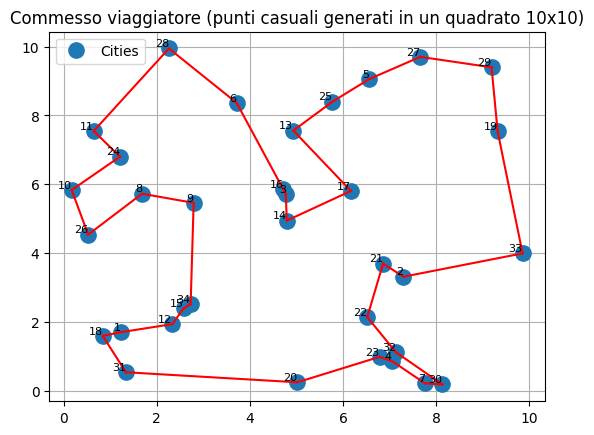

In [9]:
# Leggi i dati dal file
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_9\lez9_2\square.txt', "r") as file:
    lines = file.readlines()

# Estrai gli indici, le coordinate x e y dalle linee del file
indices = []
x = []
y = []
for line in lines:
    city_index, city_x, city_y = map(float, line.split())
    indices.append(int(city_index))
    x.append(city_x)
    y.append(city_y)

# Plot
plt.figure(2)
plt.plot(x, y, marker='o', linestyle='', markersize=11, label='Cities')

# Etichette con gli indici delle città
for i, city_index in enumerate(indices):
    plt.text(x[i], y[i], str(city_index), fontsize=8, ha='right', va='bottom')

# Linea che collega le città nell'ordine degli indici
for i in range(len(indices) - 1):
    plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='r', linestyle='-')

# Assicurati che l'ultimo punto si colleghi al primo
plt.plot([x[-1], x[0]], [y[-1], y[0]], color='r', linestyle='-')
plt.title('Commesso viaggiatore (punti casuali generati in un quadrato 10x10)')
plt.grid(True)
plt.legend()


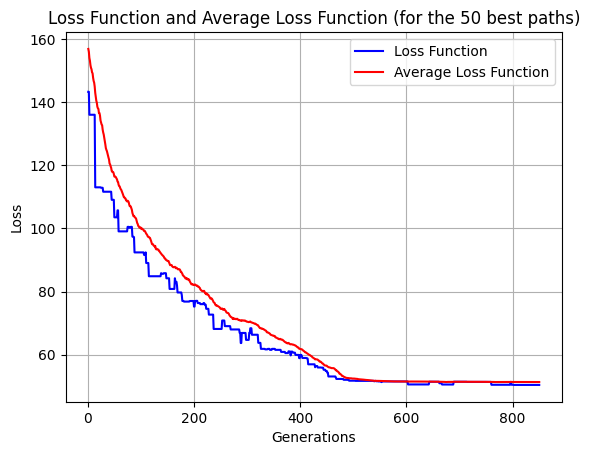

In [8]:
# Leggi i dati della loss dal file
data = r"C:\Users\Utente\Documents\Python Scripts\lezione_9\lez9_2\loss.txt"
loss = []
loss_ave = []
with open(data, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        loss.append(float(values[0]))
        loss_ave.append(float(values[1]))

# Numero di generazioni
generations = range(1, len(loss) + 1)

# Plot della loss e della loss media in funzione del numero di generazioni
plt.figure()  # Crea una nuova figura per il plot della loss
plt.plot(generations, loss, color='b', label='Loss Function')
plt.plot(generations, loss_ave, color='r', label='Average Loss Function')

plt.xlabel('Generations')
plt.ylabel('Loss')
plt.title('Loss Function and Average Loss Function (for the 50 best paths)')
plt.grid(True)
plt.legend()
plt.show()
